In [188]:
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
# from ipysankeywidget import SankeyWidget
# from ipywidgets import Layout
from pySankey import sankey
import plotly.io as pio


In [124]:
df = pd.read_csv('../egg_passage/data/h3n2_6y_hi_egg_df.csv')

sites = [col[3:] for col in df.columns if col[0:3]=='mut']

before_after = []

for site in sites:

    group = df.groupby(['circulating'+site, site]).size().reset_index(name='count')
    before_aas = list(group['circulating'+site].unique())
    after_aas = list(group[site].unique())
    
    colors = ['rgba(128,0,0,1)', 'rgba(32,178,170,1)', 'rgba(0,0,128,1)', 'rgba(255,165,0,1)', 'rgba(153,50,204,1)', 
              'rgba(250,128,114,1)', 'rgba(100,149,237,1)', 'rgba(144,238,144,1)']
    colors_transparent = ['rgba(128,0,0,0.5)', 'rgba(32,178,170,0.5)', 'rgba(0,0,128,0.5)', 
                          'rgba(255,165,0,0.5)', 'rgba(153,50,204,0.5)', 'rgba(250,128,114,0.5)', 
                          'rgba(100,149,237,0.5)', 'rgba(144,238,144,0.5)']
    aa_colors = {}
    aa_colors_transparent = {}
    for aa in after_aas:
        aa_colors[aa] = colors[after_aas.index(aa)]
        aa_colors_transparent[aa] = colors_transparent[after_aas.index(aa)]
        
    before_id = {}
    after_id = {}
    labels = []
    for i in range(len(before_aas)):
        before_id[before_aas[i]] = i
        labels.append(before_aas[i])
    for i in range(len(after_aas)):
        after_id[after_aas[i]] = i + len(before_aas)
        labels.append(after_aas[i])
        
    label_colors = [aa_colors[label] for label in labels]

    for k, v in group.iterrows():
        if v['circulating'+site]== v[site]:
            link_color = aa_colors_transparent[v[site]]
        else:
            link_color = aa_colors[v[site]]
        before_after.append({'site': site, 'before': v['circulating'+site], 'source': before_id[v['circulating'+site]], 
                             'after': v[site], 'target': after_id[v[site]], 'count': v['count'], 
                             'link_color': link_color})


before_after_df = pd.DataFrame(before_after)

In [321]:
df = pd.read_csv('../egg_passage/data/h3n2_6y_hi_egg_df.csv')


def sankey(site):
    before_after = []
    
    group = df.groupby(['circulating'+site, site]).size().reset_index(name='count')
    before_aas = list(group['circulating'+site].unique())
    after_aas = list(group[site].unique())
    
    colors = ['rgba(73, 148, 206, 1)', 'rgba(242, 116, 32, 1)', 'rgba(127, 194, 65, 1)', 
              'rgba(211, 211, 211, 1)', 'rgba(250, 188, 19, 1)',
              'rgba(138, 89, 136,1)', 'rgba(68, 158, 158,1)', 'rgba(158, 68, 68,1)']
    colors_transparent = ['rgba(73, 148, 206, 0.25)', 'rgba(242, 116, 32, 0.25)', 'rgba(127, 194, 65, 0.25)', 
            'rgba(211, 211, 211, 0.25)', 'rgba(250, 188, 19, 0.25)',
              'rgba(138, 89, 136,0.25)', 'rgba(68, 158, 158,0.25)', 'rgba(158, 68, 68,0.25)']
    colors_node = ['rgba(73, 148, 206, 0.5)', 'rgba(242, 116, 32, 0.5)', 'rgba(127, 194, 65, 0.5)', 
        'rgba(211, 211, 211, 0.5)', 'rgba(250, 188, 19, 0.5)',
          'rgba(138, 89, 136,0.5)', 'rgba(68, 158, 158,0.5)', 'rgba(158, 68, 68,0.5)']
    aa_colors = {}
    aa_colors_transparent = {}
    aa_colors_node = {}
    for aa in after_aas:
        aa_colors[aa] = colors[after_aas.index(aa)]
        aa_colors_transparent[aa] = colors_transparent[after_aas.index(aa)]
        aa_colors_node[aa] = colors_node[after_aas.index(aa)]
        
    before_id = {}
    after_id = {}
    labels = []

    for i in range(len(before_aas)):
        before_id[before_aas[i]] = i
        labels.append(before_aas[i])

    for i in range(len(after_aas)):
        after_id[after_aas[i]] = i + len(before_aas)
        labels.append(after_aas[i])

    label_colors = [aa_colors_node[label] for label in labels]

    for k, v in group.iterrows():
        if v['circulating'+site]== v[site]:
            link_color = aa_colors_transparent[v[site]]
        else:
            link_color = aa_colors[v[site]]
        before_after.append({'site': site, 'before': v['circulating'+site], 'source': before_id[v['circulating'+site]], 
                             'after': v[site], 'target': after_id[v[site]], 'count': v['count'], 
                             'link_color': link_color})

    before_after_df = pd.DataFrame(before_after)
    
    sankey_trace = dict(
        type='sankey',
        textfont=dict(
            size=28
        ),
        node = dict(
            pad = 20,
            thickness = 200,
            line = dict(
                width = 0
            ), 
            label = labels, 
            color = label_colors
        ),
        link = dict(
            source =  before_after_df['source'],
            target =  before_after_df['target'],
            value =  before_after_df['count'],
            color = before_after_df['link_color']
        ))

    layout =  dict(
        annotations = [dict(
            x=0.47,
            y=1.2,
            font = dict(size = 24),
            showarrow=False,
            text= 'HA1 site '+str(site)),
                       dict(
            x=0.0,
            y=1.2,
            font = dict(size = 18),
            showarrow=False,
            text= 'Genotype<br>Before egg-passaging'),
                       dict(
            x=0.99,
            y=1.2,
            font = dict(size = 18),
            showarrow=False,
            text= 'Genotype<br>After egg-passaging')],
    )

    fig = dict(data=[sankey_trace], layout=layout)
    return fig
#     pio.write_image(fig, 'mutations_'+str(site)+'.png')


In [322]:
# positions = ['160', '194', '186', '225', '219', '203', '156', '138']
# for position in positions:
fig = sankey('160')
py.iplot(fig)

In [197]:
files = [
  'mutations_138.png',
  'mutations_194.png',
  'mutations_160.png',
  'mutations_186.png']

result = Image.new("RGB", (800, 800))

for index, file in enumerate(files):
    path = os.path.expanduser(file)
    img = Image.open(path)
    img.thumbnail((400, 400), Image.ANTIALIAS)
    x = index // 2 * 400
    y = index % 2 * 400
    w, h = img.size
    print('pos {0},{1} size {2},{3}'.format(x, y, w, h))
    result.paste(img, (x, y, x + w, y + h))

result.save(os.path.expanduser('image.png'))

pos 0,0 size 400,285
pos 0,400 size 400,285
pos 400,0 size 400,285
pos 400,400 size 400,285


In [81]:
#TRY PLOTLY
# for site in sites:

sub_df = before_after_df[before_after_df['site']== str(160)]
before_aas = list(sub_df['before'].unique())
after_aas = list(sub_df['after'].unique())
all_labels = before_aas + after_aas

colors = ['red', 'blue', 'green', 'orange', 'yellow', 'pink', 'purple', 'teal', 'black']
color_id = {}
n=0
for a in after_aas:
    color_id[a] = colors[n]
    n+=1
label_colors = [color_id[label] for label in all_labels]

before_id = {}
after_id = {}
for i in range(len(before_aas)):
    before_id[before_aas[i]] = i
for i in range(len(after_aas)):
    after_id[after_aas[i]] = i + len(before_aas)

sankey_trace = dict(
    type='sankey',
    node = dict(
        pad = 15,
        thickness = 15,
        line = dict(
            color = "black",
            width = 0
        ), 
        label = all_labels, 
        color = label_colors
    ),
    link = dict(
        source =  [],
        target =  [],
        value =  [],
        color =  []
    ))

layout =  dict(
    title = str(160),
    font = dict(
        size = 10))

for k, v in sub_df.iterrows():
    sankey_trace['link']['source'].append(before_id[v['before']]) 
    sankey_trace['link']['target'].append(after_id[v['after']])
    sankey_trace['link']['value'].append(v['count'])
    sankey_trace['link']['color'].append(v['color'])

fig = dict(data=[sankey_trace], layout=layout)
py.iplot(fig)


In [7]:
#TRY SANKEY WIDGET
# for site in sites:

sub_df = before_after_df[before_after_df['site']== str(160)]
before_aas = list(sub_df['before'].unique())
after_aas = list(sub_df['after'].unique())
all_labels = before_aas + after_aas

colors = ['red', 'blue', 'green', 'orange', 'yellow', 'pink', 'purple', 'teal', 'black']
color_id = {}
n=0
for a in after_aas:
    color_id[a] = colors[n]
    n+=1

before_id = {}
after_id = {}
for i in range(len(before_aas)):
    before_id[before_aas[i]] = i
for i in range(len(after_aas)):
    after_id[after_aas[i]] = i + len(before_aas)

links = []
nodes = []


for k, v in sub_df.iterrows():
    links.append({'source': (before_id[v['before']]+0.5), 'target': after_id[v['after']], 
                  'value': v['count'], 'color': color_id[v['after']]})

for k,v in before_id.items():
    before_total = sub_df[sub_df['before']==k]['count'].sum()
    links.append({'source': v, 'target': (v+0.5), 
                  'value': before_total, 'color': color_id[k]})
    nodes.append({'id': v, 'title': k})
    nodes.append({'id': v+0.5, 'title': ''})
    
for k,v in after_id.items():
    nodes.append({'id': v, 'title': k})




sankey= SankeyWidget(links=links, nodes=nodes, align_link_types=True, ax=ax[0])
sankey

SankeyWidget(align_link_types=True, links=[{'source': 0.5, 'target': 2, 'value': 160, 'color': 'red'}, {'sourc…

In [324]:
#TRY PYSANKEY
# fig, ax = plt.subplots(1, len(sites))

sub_df = before_after_df[before_after_df['site']== str(160)]
sankey.sankey(left=sub_df['before'], right=sub_df['after'], leftWeight=sub_df['count'], 
              rightWeight=sub_df['count'])

AttributeError: 'function' object has no attribute 'sankey'

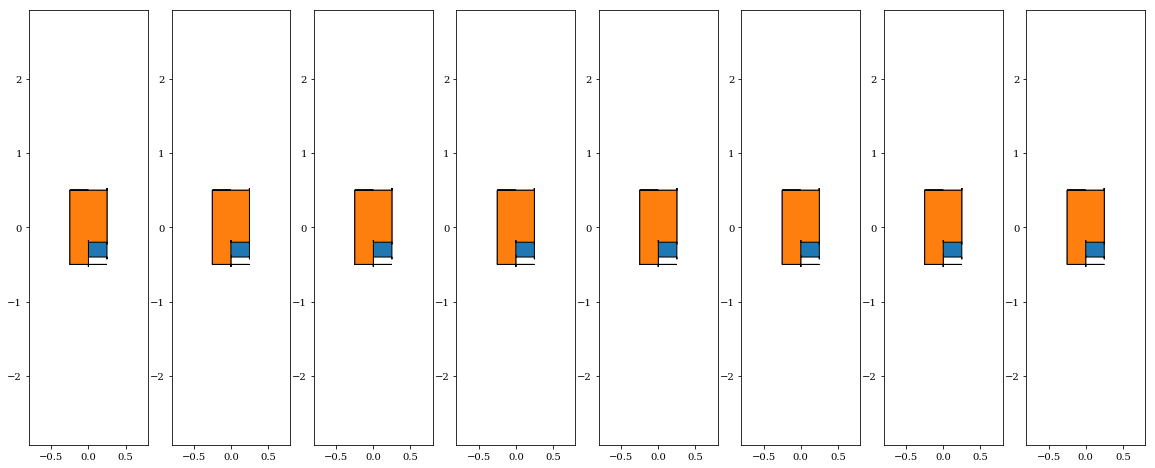

In [68]:
#TRY MATPLOTLIB
from matplotlib.sankey import Sankey
fig, ax = plt.subplots(1,len(sites), figsize=(20, 8))

for site in sites:

    sub_df = before_after_df[before_after_df['site']== str(160)]
    sankey = Sankey(ax=ax[sites.index(site)], head_angle=180, unit=None)
    sankey.add(flows=[1.0, -0.9, -0.1], 
               orientations = [0, 0, 0])
    sankey.add(flows=[1.0, -0.7, -0.3], orientations = [0, 0, 0])
    diagrams = sankey.finish()